# Video Game Sales
### Group9: Anna Bergknut, Jeff Andersson, Sebastian Johansson

In [56]:
%matplotlib inline
import matplotlib.pyplot as mpl

import pandas as pd
import numpy  as np
import scipy.stats as scp

In [134]:
dataset = pd.read_csv("vgsalesFiltered.csv", sep=",")
dataset

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16186,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16187,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16188,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16189,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


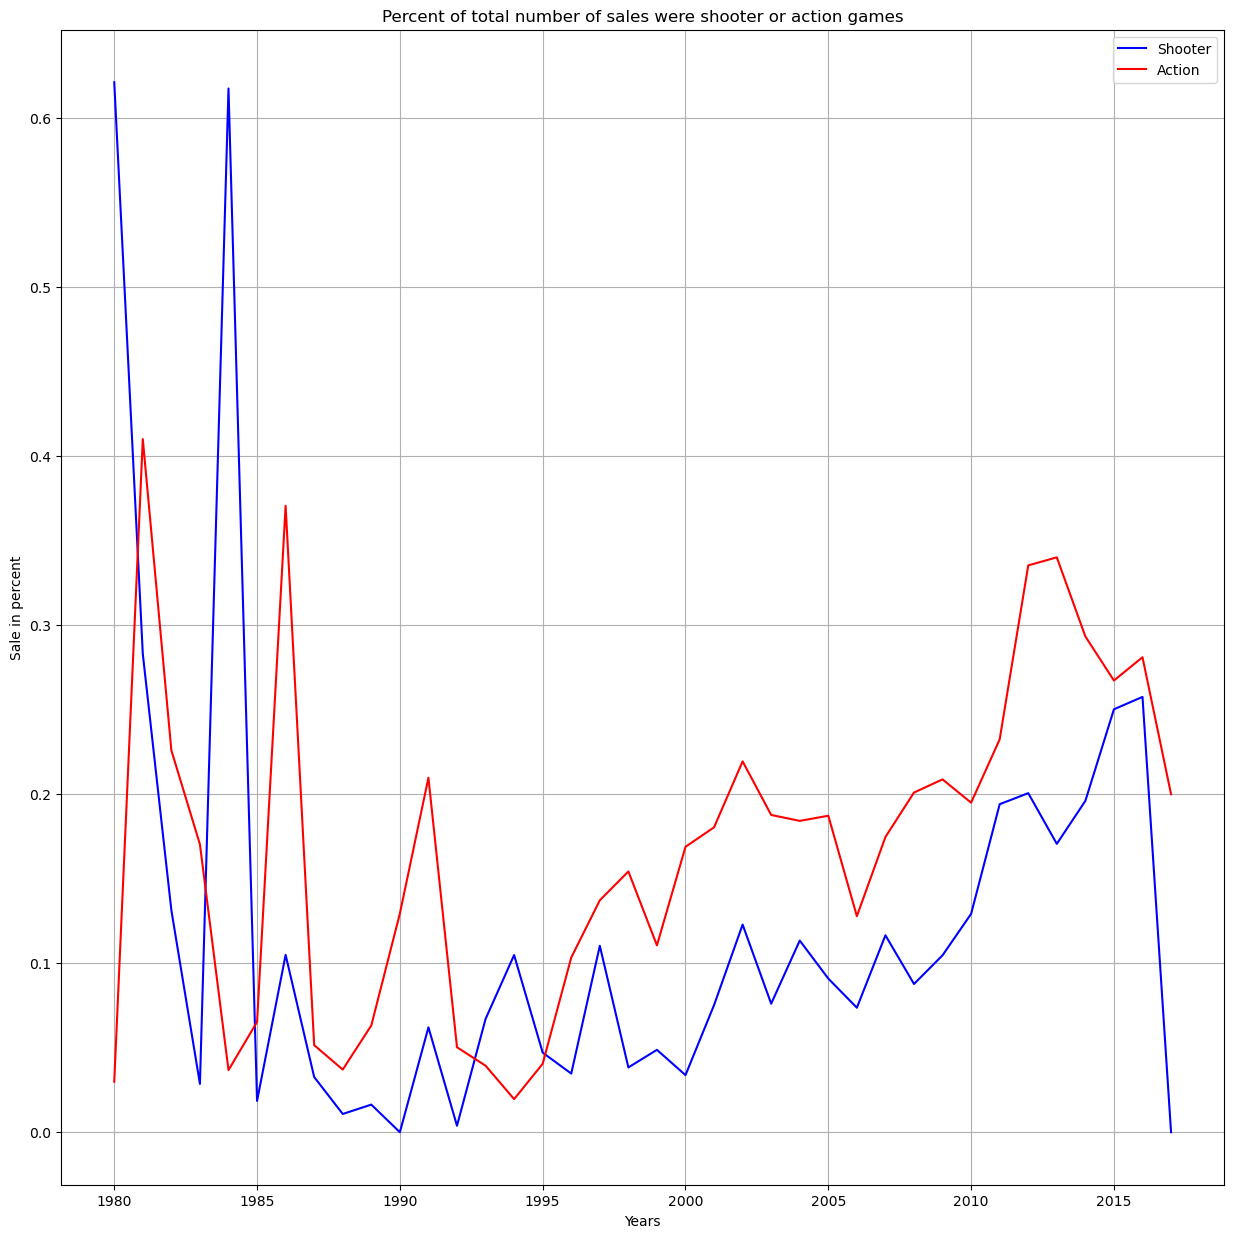

In [142]:
atotalSales = (dataset.groupby('Year')['Global_Sales'].sum()).to_frame()

shooter = dataset[dataset['Genre'] == 'Shooter']
action = dataset[dataset['Genre'] == 'Action']
sYearSalesG = (shooter.groupby("Year")['Global_Sales'].sum()/atotalSales['Global_Sales']).to_frame()
aYearSalesG = (action.groupby("Year")['Global_Sales'].sum()/atotalSales['Global_Sales']).to_frame()   

sYearSalesG = sYearSalesG.fillna(0)
aYearSalesG = aYearSalesG.fillna(0)

sYearSalesG.rename(columns = {'Global_Sales':'shooting_Sales'}, inplace = True)
aYearSalesG.rename(columns = {'Global_Sales':'action_Sales'}, inplace = True)

shoot_action = pd.concat([sYearSalesG, aYearSalesG], axis = 1)

fig = mpl.figure(figsize = (15,15))
ax = fig.add_subplot()
ax.grid()

# data_polreg = np.polyfit(shoot_action[0], shoot_action['shooting_Sales'], 4) #jag vet varför det inte funkar nu. 'Year' andcänds som index så det är inte en column så year är inget attribut namn tror jag
# xp = np.linspace(1980, 2017, 39)
# pr = np.polyval(data_polreg, xp)
# ax.plot(xp, pr, color = "purple", label = "polynomial regression")

ax.set_xlabel("Years")
ax.set_ylabel("Sale in percent")
ax.set_title("Percent of total number of sales were shooter or action games")

ax.plot(sYearSalesG['shooting_Sales'], label='Shooter', color = ('Blue'))
ax.plot(aYearSalesG['action_Sales'], label='Action', color = ('red'))

ax.legend()

In [140]:
shoot_action


,shooting_Sales,action_Sales
Year,,
1980.0,0.621265,0.029877
1981.0,0.282976,0.410090
1982.0,0.131324,0.225918
1983.0,0.028588,0.170339
1984.0,0.617554,0.036736
1985.0,0.018539,0.065258
1986.0,0.104937,0.370650
1987.0,0.032659,0.051518
1988.0,0.010801,0.037061


C:\Users\annan\AppData\Local\Temp\ipykernel_8816\4292750688.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  totalSales = dataset.groupby('Year')['JP_Sales','NA_Sales', 'EU_Sales', 'Global_Sales'].sum()


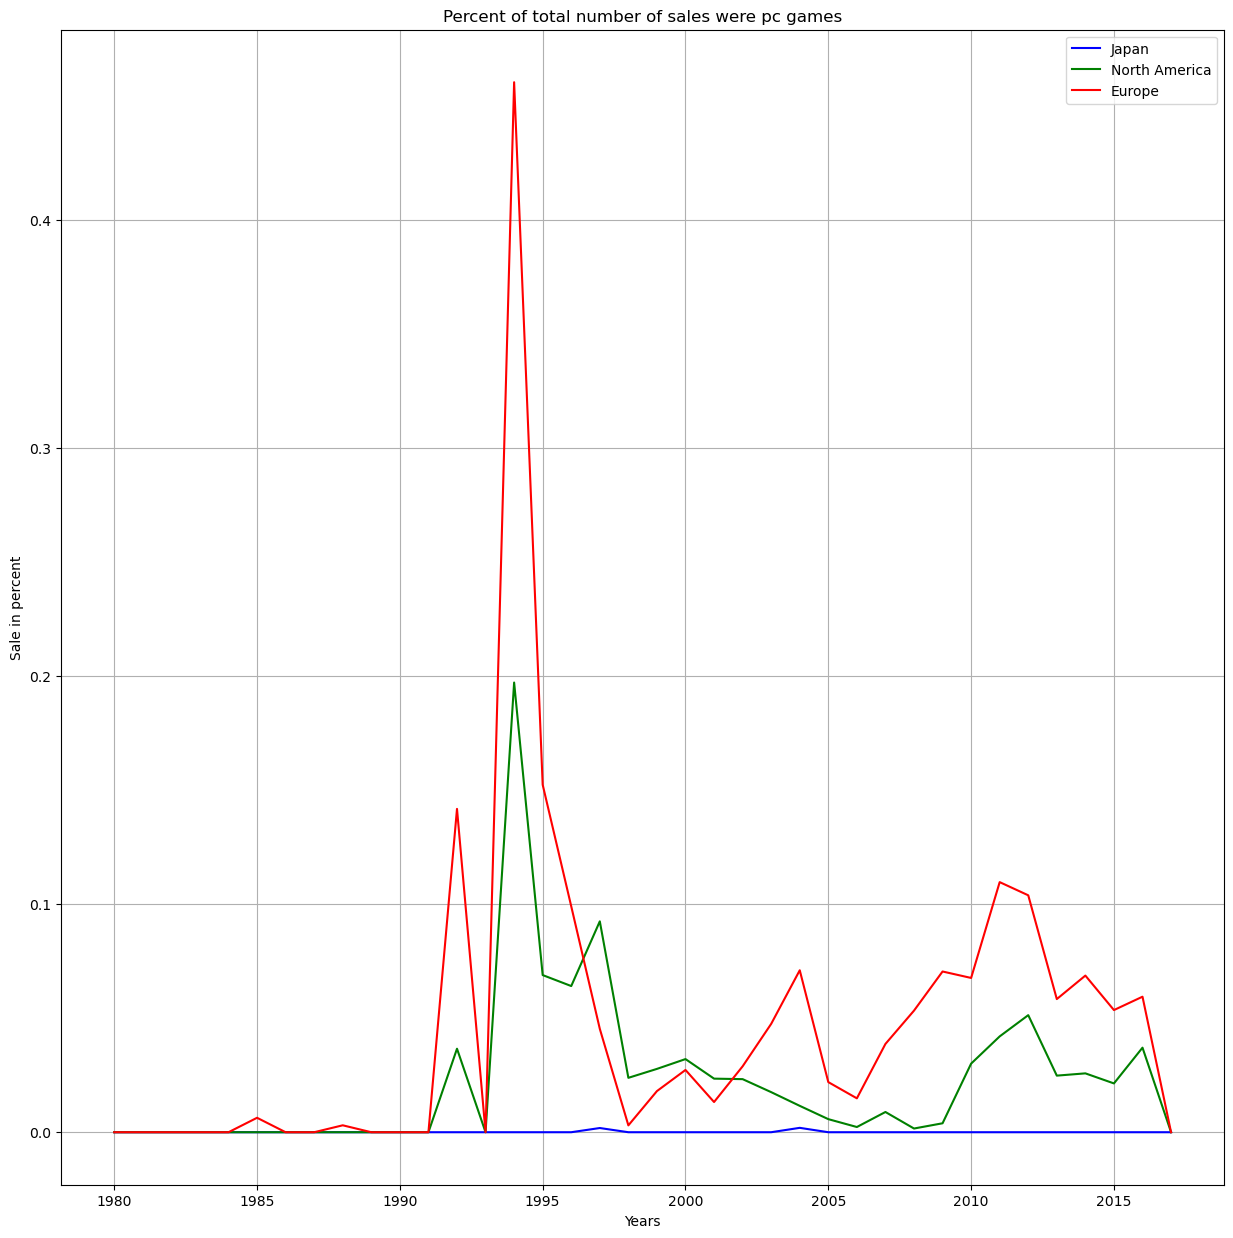

In [151]:
totalSales = dataset.groupby('Year')['JP_Sales','NA_Sales', 'EU_Sales', 'Global_Sales'].sum()

pc = dataset[dataset['Platform'] == 'PC']
yearSalesJP = (pc.groupby("Year")['JP_Sales'].sum()/totalSales['JP_Sales']).to_frame()
yearSalesNA = (pc.groupby("Year")["NA_Sales"].sum()/totalSales['NA_Sales']).to_frame()
yearSalesEU = (pc.groupby("Year")["EU_Sales"].sum()/totalSales['EU_Sales']).to_frame()

yearSalesJP = yearSalesJP.fillna(0)
yearSalesNA = yearSalesNA.fillna(0)
yearSalesEU = yearSalesEU.fillna(0)


pcSales = pd.concat([yearSalesJP, yearSalesNA, yearSalesEU], axis = 1)
# pcSales.drop(pcSales.index[len(pcSales)-1]

fig = mpl.figure(figsize = (15,15))
ax = fig.add_subplot()
ax.grid()

ax.set_xlabel("Years")
ax.set_ylabel("Sale in percent")
ax.set_title("Percent of total number of sales were pc games")

# data_polreg = np.polyfit(totalSales.Year, totalSales.Global_Sales, 4)
# xp = np.linspace(1980, 2017, 39)
# pr = np.polyval(data_polreg, xp)
# ax.plot(xp, pr, color = "purple", label = "polynomial regression")

ax.plot(yearSalesJP['JP_Sales'], label='Japan', color = ('Blue'))
ax.plot(yearSalesNA['NA_Sales'], label='North America', color = ('Green'))
ax.plot(yearSalesEU['EU_Sales'], label='Europe', color = ('Red'))

ax.legend()

In [150]:
pcSales

,JP_Sales,NA_Sales,EU_Sales
Year,,,
1980.0,0.000000,0.000000,0.000000
1981.0,0.000000,0.000000,0.000000
1982.0,0.000000,0.000000,0.000000
1983.0,0.000000,0.000000,0.000000
1984.0,0.000000,0.000000,0.000000
1985.0,0.000000,0.000000,0.006329
1986.0,0.000000,0.000000,0.000000
1987.0,0.000000,0.000000,0.000000
1988.0,0.000000,0.000000,0.003035


### pc test

In [155]:
result = scp.kruskal(shoot_action.loc[1980].values.tolist(),shoot_action.loc[1981].values.tolist(),shoot_action.loc[1982].values.tolist(),shoot_action.loc[1983].values.tolist(),shoot_action.loc[1984].values.tolist(),shoot_action.loc[1985].values.tolist(),shoot_action.loc[1986].values.tolist(),shoot_action.loc[1987].values.tolist(),shoot_action.loc[1988].values.tolist(),shoot_action.loc[1989].values.tolist(), shoot_action.loc[1990].values.tolist(), shoot_action.loc[1991].values.tolist(), shoot_action.loc[1992].values.tolist(), shoot_action.loc[1993].values.tolist(), shoot_action.loc[1994].values.tolist(), shoot_action.loc[1995].values.tolist(), shoot_action.loc[1996].values.tolist(), shoot_action.loc[1997].values.tolist(), shoot_action.loc[1998].values.tolist(), shoot_action.loc[1999].values.tolist(), shoot_action.loc[2000].values.tolist(), shoot_action.loc[2001].values.tolist(), shoot_action.loc[2002].values.tolist(), shoot_action.loc[2003].values.tolist(), shoot_action.loc[2004].values.tolist(), shoot_action.loc[2005].values.tolist(), shoot_action.loc[2006].values.tolist(), shoot_action.loc[2007].values.tolist(), shoot_action.loc[2008].values.tolist(), shoot_action.loc[2009].values.tolist(), shoot_action.loc[2010].values.tolist(),shoot_action.loc[2011].values.tolist(),shoot_action.loc[2012].values.tolist(),shoot_action.loc[2013].values.tolist(),shoot_action.loc[2014].values.tolist(),shoot_action.loc[2015].values.tolist(),shoot_action.loc[2016].values.tolist(),shoot_action.loc[2017].values.tolist())
result

KruskalResult(statistic=45.85828240987572, pvalue=0.1506624432300712)

### shooting test

In [154]:
resultpc = scp.kruskal(pcSales.loc[1980].values.tolist(),pcSales.loc[1981].values.tolist(),pcSales.loc[1982].values.tolist(),pcSales.loc[1983].values.tolist(),pcSales.loc[1984].values.tolist(),pcSales.loc[1985].values.tolist(),pcSales.loc[1986].values.tolist(),pcSales.loc[1987].values.tolist(),pcSales.loc[1988].values.tolist(),pcSales.loc[1989].values.tolist(), pcSales.loc[1990].values.tolist(), pcSales.loc[1991].values.tolist(), pcSales.loc[1992].values.tolist(), pcSales.loc[1993].values.tolist(), pcSales.loc[1994].values.tolist(), pcSales.loc[1995].values.tolist(), pcSales.loc[1996].values.tolist(), pcSales.loc[1997].values.tolist(), pcSales.loc[1998].values.tolist(), pcSales.loc[1999].values.tolist(), pcSales.loc[2000].values.tolist(), pcSales.loc[2001].values.tolist(), pcSales.loc[2002].values.tolist(), pcSales.loc[2003].values.tolist(), pcSales.loc[2004].values.tolist(), pcSales.loc[2005].values.tolist(), pcSales.loc[2006].values.tolist(), pcSales.loc[2007].values.tolist(), pcSales.loc[2008].values.tolist(), pcSales.loc[2009].values.tolist(), pcSales.loc[2010].values.tolist(),pcSales.loc[2011].values.tolist(),pcSales.loc[2012].values.tolist(),pcSales.loc[2013].values.tolist(),pcSales.loc[2014].values.tolist(),pcSales.loc[2015].values.tolist(),pcSales.loc[2016].values.tolist(),pcSales.loc[2017].values.tolist())
resultpc

KruskalResult(statistic=48.88118703566054, pvalue=0.09147130913291007)